### This example shows how to create SSAKG and insert some number of encoded MicroRNA sequences (e.g. 1000).

In [1]:
from microrna.mirna_encoder import MicroRNAEncoder
from microrna.ssakg_mirna_tester import SSAKG_miRNA_Tester
from ssakg import SSAKG
from fasta_helper import FastaHelper

The first thing we need to do is prepare the microRNA sequences.
The sequences are stored in the file mature.fa.
This file can be downloaded from miRBase.
In this example, we selected 1000 miRNA with length 20.

In [2]:
dirname = "data"
fasta_helper = FastaHelper(dirname, "mature.fa")

sequence_length = 20
no_sequences = 1000

read_sequences = fasta_helper.get_filter_sequences(sequence_length, no_sequences)

The sequences downloaded from miRBase contain four nucleotides, which produce only four symbols.
To store them in SSAKG, we provide encoder. These encoders translate groups of nucleotides into more symbols.

In [3]:
padding_left = 2
padding_right = 3

micro_rna_encoder = MicroRNAEncoder(symbol_padding_left=padding_left, symbol_padding_right=padding_right)
enc_sequences = micro_rna_encoder.encode_sequences(read_sequences)

Now we are ready to create an SSAKG with the appropriate number of neurons in it.

In [4]:
no_symbols = micro_rna_encoder.get_max_no_symbols()
sequence_length = len(enc_sequences[0])
ssakg = SSAKG(number_of_symbols=no_symbols, sequence_length=sequence_length)
ssakg.insert(enc_sequences)

Let's make some test.
For this purpose, we use SSAKG_miRNA_Tester object.
This tester reads all encoded miRNA sequences and make test ordering for the provided algorithms.
The tester creates a context in which the elements occur directly one after the other, as opposed to the standard context,
which contains unsorted elements.

ssakg test progress
0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:01


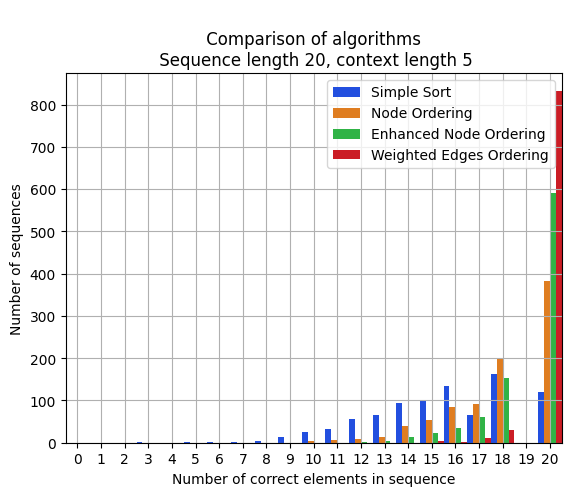

ssakg dimension: 4201
sequence length: 20
context length: 5
unordered sequences restored: 88.20%
                         no sequences  correct  incorrect correct sort percentage
Simple Sort                       882      121        761                  13.72%
Node Ordering                     882      383        499                  43.42%
Enhanced Node Ordering            882      590        292                  66.89%
Weighted Edges Ordering           882      833         49                  94.44%


In [5]:
ssakg_tester = SSAKG_miRNA_Tester(ssakg, enc_sequences, padding_left=padding_left, padding_right=padding_right)

ssakg_tester.make_test(context_length=5, show_progress=True)
ssakg_tester.plot_agreement_histogram(draw_text=True)

print(ssakg_tester)
